<a href="https://colab.research.google.com/github/YoussifAssem/Genetics/blob/main/E-Genetics/Genetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports library**

In [155]:
import pandas as pd
import pandas as dia
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

**Reading DataSet (Alzahaimer's)**

In [156]:
dS = pd.read_csv('drive/MyDrive/graduation/Alzheimers.csv')
dS.head()

,gene_name,refseq_id,miR,SNP,diseases,distance,experimentally_confirmed
0,LOC100379224,NR_033341,hsa-miR-573,rs3746319,Alzheimer's disease,0,NaN
1,LOC100379224,NR_033341,hsa-miR-185,rs4508518,Alzheimer's disease,0,NaN
2,LIPA,NM_001127605,hsa-miR-1324,rs13500,Alzheimer's disease,0,NaN
3,TRAF2,NM_021138,hsa-miR-199a-5p,rs7852970,Alzheimer's disease,0,NaN
4,TRAF2,NM_021138,hsa-miR-199b-5p,rs7852970,Alzheimer's disease,0,NaN


**Reading DataSet (Diabates)**

In [157]:
diabates1 = dia.read_csv('drive/MyDrive/graduation/diabates1.csv')  
diabates1.head()

,gene_name,refseq_id,miR,SNP,diseases,distance,experimentally_confirmed
0,HLA-DQB2,NR_003937,hsa-miR-641,rs1573649,Type 1 diabetes,0,NaN
1,ADM2,NM_024866,hsa-miR-658,rs761745,Type 1 diabetes,0,NaN
2,HLA-DQB2,NR_003937,hsa-miR-422a,rs1049110,Type 1 diabetes,0,NaN
3,HLA-DQB2,NR_003937,hsa-miR-378,rs1049110,Type 1 diabetes,0,NaN
4,RPH3A,NM_014954,hsa-miR-1255a,rs2240191,Type 1 diabetes,0,NaN


**Illustrate DataSet**


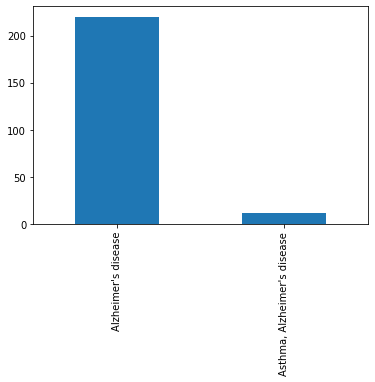

In [158]:
dS['diseases'].value_counts().plot.bar()

**Illustrate DataSet**


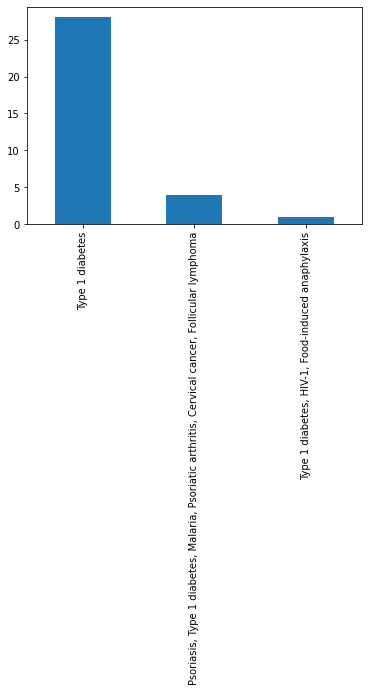

In [159]:
diabates1['diseases'].value_counts().plot.bar()

**Pre processing Data for (Alzahaimer's)**

In [160]:
dS['gene_name'] = pd.get_dummies(dS['gene_name'])
dS['refseq_id'] = pd.get_dummies(dS['refseq_id'])
dS['miR'] = pd.get_dummies(dS['miR'])
dS['SNP'] = pd.get_dummies(dS['SNP'])
dS['experimentally_confirmed'] = pd.get_dummies(dS['experimentally_confirmed'])
dS.head()

,gene_name,refseq_id,miR,SNP,diseases,distance,experimentally_confirmed
0,0,0,0,0,Alzheimer's disease,0,0
1,0,0,0,0,Alzheimer's disease,0,0
2,0,0,0,0,Alzheimer's disease,0,0
3,0,0,0,0,Alzheimer's disease,0,0
4,0,0,0,0,Alzheimer's disease,0,0


**Pre processing Data for (diabates)**

In [161]:
diabates1['gene_name'] = pd.get_dummies(diabates1['gene_name'])
diabates1['refseq_id'] = pd.get_dummies(diabates1['refseq_id'])
diabates1['miR'] = pd.get_dummies(diabates1['miR'])
diabates1['SNP'] = pd.get_dummies(diabates1['SNP'])
diabates1['experimentally_confirmed'] = pd.get_dummies(diabates1['experimentally_confirmed'])
diabates1.head()

,gene_name,refseq_id,miR,SNP,diseases,distance,experimentally_confirmed
0,0,0,0,0,Type 1 diabetes,0,0
1,1,0,0,0,Type 1 diabetes,0,0
2,0,0,0,1,Type 1 diabetes,0,0
3,0,0,0,1,Type 1 diabetes,0,0
4,0,0,0,0,Type 1 diabetes,0,0


**Make Data Ready for Creating Algorithms of(Alzahaimer's)**

In [162]:
X_train, X_test, y_train, y_test = train_test_split(dS.drop('diseases', axis=1), dS['diseases'], test_size= 0.3)

print('Training data With X: \n ', X_train)
print('Training data With Y: \n ', y_train)
print('\n\n\n\n\nX_TEST : ', X_test)
print('\n\n\nY_TEST : ', y_test)


from sklearn.metrics import accuracy_score

Training data With X: 
       gene_name  refseq_id  miR  SNP  distance  experimentally_confirmed
191          0          0    0    0      1788                         0
169          0          0    0    0      1227                         0
154          0          0    0    0      -807                         0
174          0          0    0    0      1227                         0
115          0          0    0    1       599                         0
..         ...        ...  ...  ...       ...                       ...
226          0          0    0    0      2388                         0
53           0          0    0    0      -208                         0
7            0          0    0    0       -70                         0
119          0          0    0    1       599                         0
94           0          0    0    0      -516                         0

[162 rows x 6 columns]
Training data With Y: 
  191    Alzheimer's disease
169    Alzheimer's disease
154    A

**Make Data Ready for creating Algorithms of (Diabates)**

In [163]:
diabatesX_train, diabatesX_test, diabatesy_train, diabatesy_test = train_test_split(diabates1.drop('diseases', axis=1), diabates1['diseases'], test_size= 0.3)

print('Training data With X: \n ', diabatesX_train)
print('Training data With Y: \n ', diabatesy_train)
print('\n\n\n\n\nX_TEST : ', diabatesX_test)
print('\n\n\nY_TEST : ', diabatesy_test)


Training data With X: 
      gene_name  refseq_id  miR  SNP  distance  experimentally_confirmed
13          0          0    0    0      -209                         0
14          0          0    0    0       228                         0
18          0          0    0    0       930                         0
16          0          1    0    0      -337                         0
9           0          0    0    0      -157                         0
32          0          0    0    0      3683                         0
8           0          1    0    0        92                         0
23          0          1    0    0      1537                         0
7           0          1    0    0        92                         1
22          0          1    0    0      1537                         1
31          0          0    0    0      3630                         0
24          0          0    0    0      2169                         0
10          0          0    0    0      -176        

**Creating KNN Algorithm for (Alzahaimer's)**

In [164]:
zahaKNN = KNeighborsClassifier(n_neighbors=3)
zahaKNN.fit(X_train, y_train)
print('Predicted With Input Zahaimer KNN:', zahaKNN.predict([[0 , 1, 1, 1, -2210, 0]]))

Predicted With Input Zahaimer KNN: ["Alzheimer's disease"]


**Accuracy of KNN Acoording To (Alzahaimer's)**

In [165]:
zaha_KNN = zahaKNN.predict(X_test)
zaha_predictionsKNN = [value for value in zaha_KNN]
accuracy = accuracy_score(y_test, zaha_predictionsKNN)
print("Accuracy for zahaimer KNN: %.2f%%" % (accuracy * 100.0))

Accuracy for zahaimer KNN: 97.14%


**Creating XGBOOST For (Alzahaimer's)**

In [166]:
zahaXGBOOST = XGBClassifier()
zahaXGBOOST.fit(X_train, y_train)
print('Predicted With Input Zahaimer XGBOOST:', zahaKNN.predict([[0 , 1, 1, 1, 1540, 0]]))

Predicted With Input Zahaimer XGBOOST: ["Alzheimer's disease"]


**Accuracy of XGBOOST According To (Alzahaimer's)**

In [168]:
zaha_pred = zahaXGBOOST.predict(X_test)
zaha_predictions = [value for value in zaha_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, zaha_predictions)
print("Accuracy for Zahaimer XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy for Zahaimer XGBOOST: 98.57%


**Creating Decision Tree for (Alzahaimer's)**

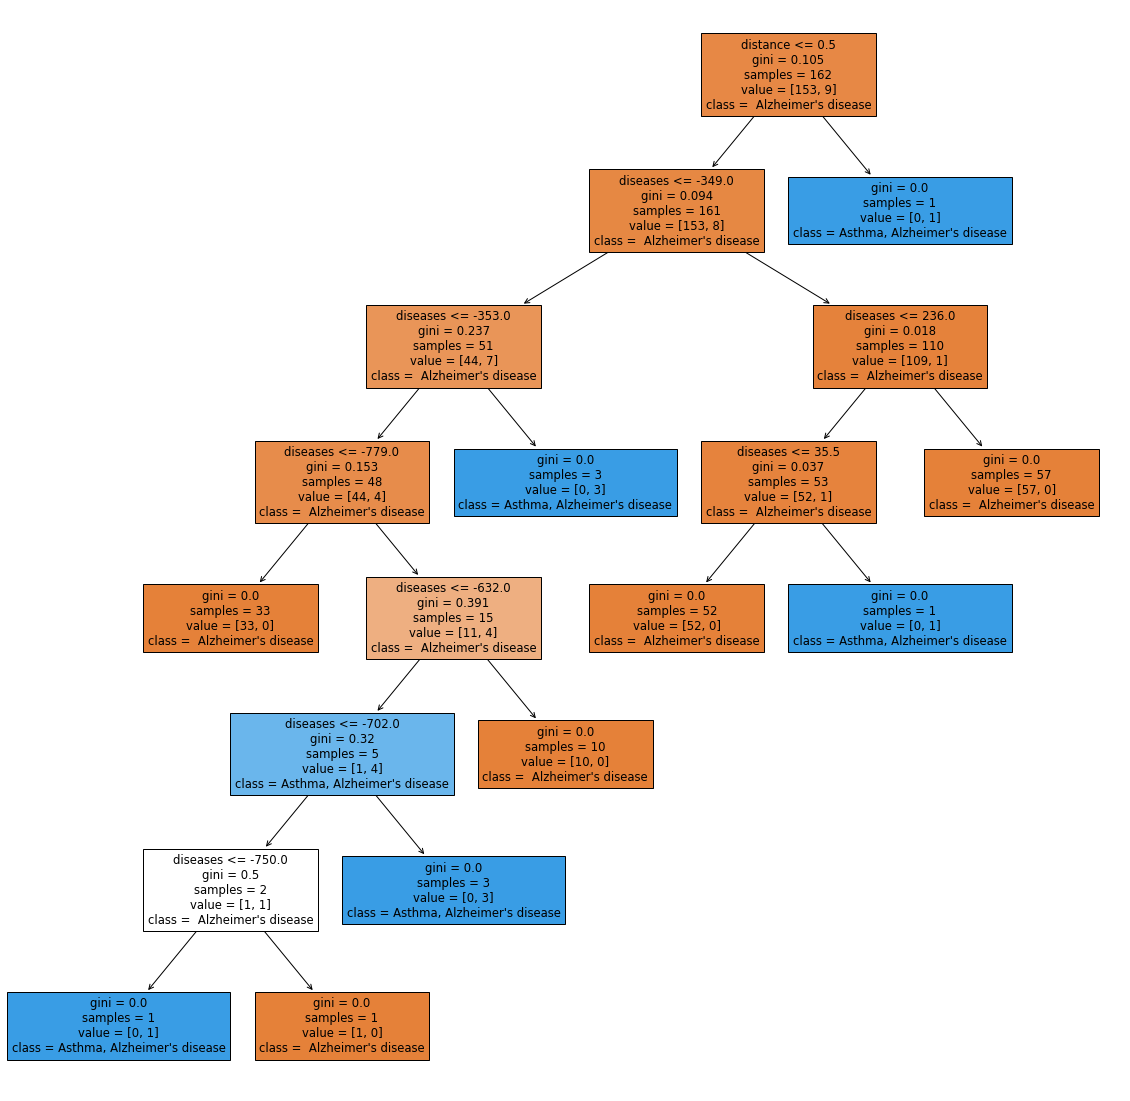

In [169]:
zaha_tree = DecisionTreeClassifier()
zaha_tree.fit(X_train, y_train)
fi = plt.figure(figsize=(20, 20))
plo = plot_tree(zaha_tree, feature_names=list(dS.columns), class_names=[" Alzheimer's disease", "Asthma, Alzheimer's disease"],filled=True)

**Accuracy of Decision Tree According To (Alzahaimer's)**

In [170]:
zaha_DT = zaha_tree.predict(X_test)
zaha_predictionsDT = [value for value in zaha_DT]
accuracy = accuracy_score(y_test, zaha_predictionsDT)
print("Accuracy for Zahaimer Decession Tree: %.2f%%" % (accuracy * 100.0))

Accuracy for Zahaimer Decession Tree: 92.86%


**Creating KNN Algorithm for (Diabates)**

In [171]:
diabatesKNN = KNeighborsClassifier(n_neighbors=3)
diabatesKNN.fit(diabatesX_train, diabatesy_train)
print('Predicted With Input Diabates KNN:', diabatesKNN.predict([[0 , 1, 1, 1, -209, 0]]))

Predicted With Input Diabates KNN: ['Psoriasis, Type 1 diabetes, Malaria, Psoriatic arthritis, Cervical cancer, Follicular lymphoma']


**Accuracy of KNN According To (Diabates)**

In [172]:
diabates_KNN = diabatesKNN.predict(diabatesX_test)
diabates_predictionsKNN = [value for value in diabates_KNN]
accuracy = accuracy_score(diabatesy_test, diabates_predictionsKNN)
print("Accuracy for Diabates KNN: %.2f%%" % (accuracy * 100.0))

Accuracy for Diabates KNN: 80.00%


**Creating XGBOOST For (Diabates)**

In [173]:
diabatesXGBOOST = XGBClassifier()
diabatesXGBOOST.fit(diabatesX_train, diabatesy_train)
print('Predicted With Input Diabates XGOOST:', diabatesKNN.predict([[0 , 1, 1, 1, -209, 0]]))

Predicted With Input Diabates XGOOST: ['Psoriasis, Type 1 diabetes, Malaria, Psoriatic arthritis, Cervical cancer, Follicular lymphoma']


**Accuracy of XGBOOST According To (Diabates)**

In [174]:
diabates_pred = diabatesXGBOOST.predict(diabatesX_test)
diabates_predictions = [value for value in diabates_pred]
# evaluate predictions
accuracy = accuracy_score(diabatesy_test, diabates_predictions)
print("Accuracy for Diabates XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy for Diabates XGBOOST: 80.00%


**Creating Decision Tree (Diabates)**

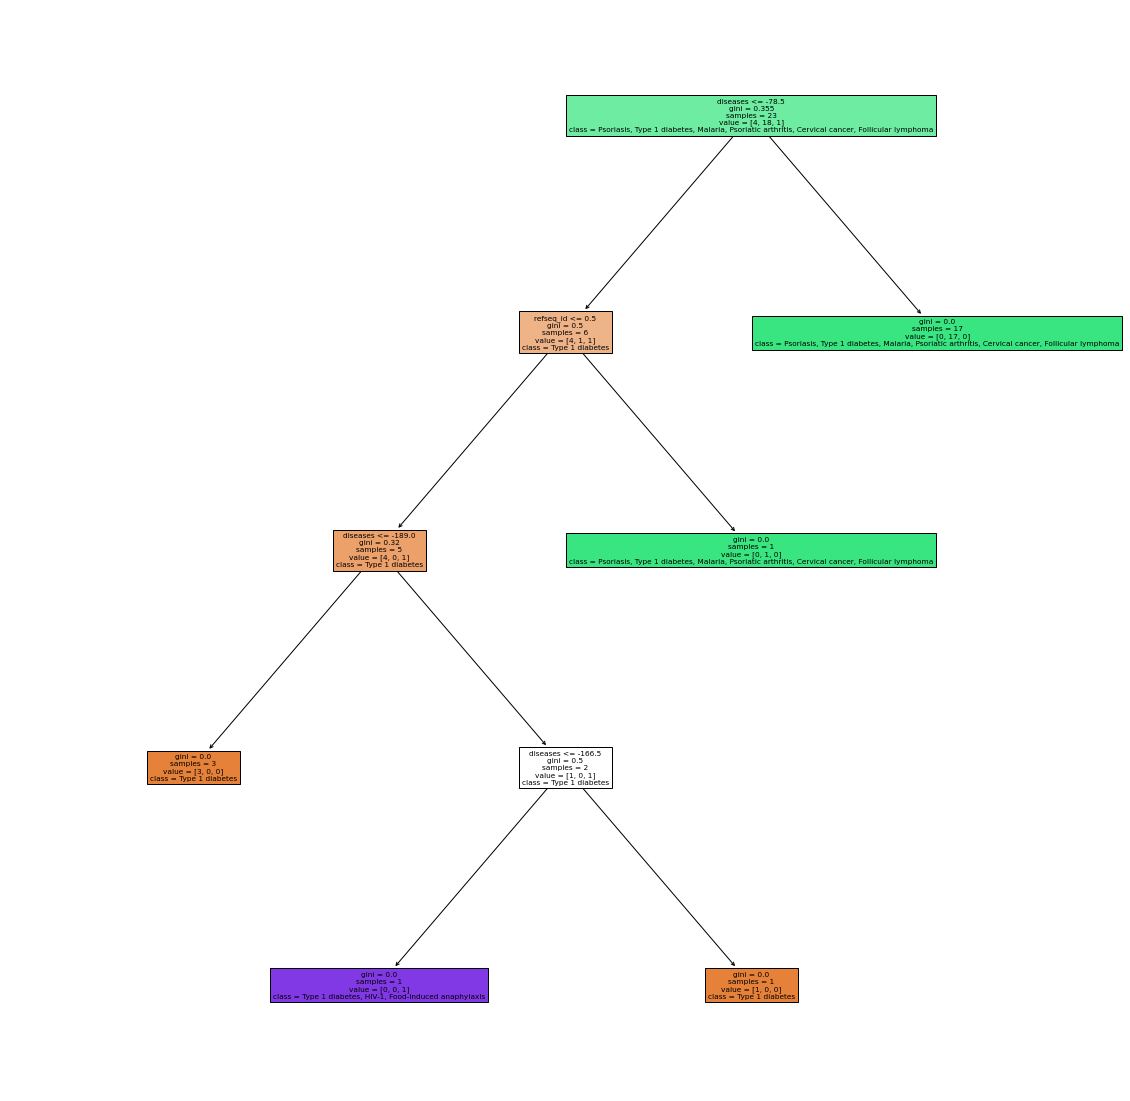

In [175]:
diabatesTreeClassifier = DecisionTreeClassifier()
diabatesTreeClassifier.fit(diabatesX_train, diabatesy_train)
fi = plt.figure(figsize=(20, 20))
plo = plot_tree(diabatesTreeClassifier, feature_names=list(dS.columns), class_names=["Type 1 diabetes", "Psoriasis, Type 1 diabetes, Malaria, Psoriatic arthritis, Cervical cancer, Follicular lymphoma", "Type 1 diabetes, HIV-1, Food-induced anaphylaxis"],filled=True)

****Accuracy of Decision Tree According To (Diabates)****

In [176]:
diabatesDT = diabatesTreeClassifier.predict(diabatesX_test)
diabates_predictionsDT = [value for value in diabatesDT]
# evaluate predictions
accuracy = accuracy_score(diabatesy_test, diabates_predictionsDT)
print("Accuracy for Diabates XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy for Diabates XGBOOST: 100.00%
